# Querying BIND WP FAIR data

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from SPARQLWrapper import SPARQLWrapper, JSON, DIGEST, BASIC
from SPARQLWrapper import SPARQLWrapper2

### Functions

In [2]:
def query_to_dataframe(query_results):
    """
    Function to transform SPARQL query results into a clean list of dictionaries.
    
    query_results: A list of query results returned by SPARQLWrapper.
    return: A list of dictionaries, where each dictionary represents a result row 
    and has keys corresponding to the variables in the SPARQL SELECT clause.
    """
    new_results = []
    for result in query_results:
        new_result = {}
        for key in result:
            new_result[key] = result[key]['value']
        new_results.append(new_result)
    return new_results

## From file

### WP2 - Basescope

#### Query 6: Provide a table/graph/heatmap with the presence of dystrophin isoform expression by anatomical area 

sparql.setQuery("""

PREFIX obo: <http://purl.obolibrary.org/obo/>

PREFIX sio: <http://semanticscience.org/resource/>

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

    SELECT * WHERE
    { 
    {
       select DISTINCT ?anat ?dystrophin (AVG(?val) AS ?avg_val) where { 
        ?exp a obo:NCIT_C15783.
        ?exp sio:SIO_000300 ?val.
        ?process sio:SIO_000229 ?exp.
        ?process sio:SIO_000230 ?sample.
        ?process sio:SIO_000291 ?dystrophin.
        ?sprocess sio:SIO_000229 ?sample.
        ?sprocess sio:SIO_000230 ?anat. 
        ?anat sio:SIO_000068 ?person.
        ?person a obo:NCBITaxon_9606.
    } GROUP BY ?anat ?dystrophin 
    }
    UNION
    {
        select DISTINCT ?anat ?dystrophin (AVG(?val) AS ?avg_val) where { 
        ?exp a obo:NCIT_C15783.
        ?exp sio:SIO_000300 ?val.
        ?process sio:SIO_000229 ?exp.
        ?process sio:SIO_000230 ?sample.
        ?process sio:SIO_000291 ?dystrophin.
        ?sprocess sio:SIO_000229 ?sample.
        ?sprocess sio:SIO_000230 ?layer.
        ?layer sio:SIO_000068 ?anat.
        ?anat sio:SIO_000068 ?person.
        ?person a obo:NCBITaxon_9606.
    } GROUP BY ?anat ?dystrophin 
    }
    }
    """
)

In [11]:
# read data file 
data_df = pd.read_csv('./query-result-wp2-basescope-6.tsv', sep='\t')
print(data_df.shape)
data_df.head()

(54, 3)


?anat  \
0  <https://rdf.biosemantics.org/resources/bind/a...   
1  <https://rdf.biosemantics.org/resources/bind/a...   
2  <https://rdf.biosemantics.org/resources/bind/a...   
3  <https://rdf.biosemantics.org/resources/bind/a...   
4  <https://rdf.biosemantics.org/resources/bind/a...   

                                         ?dystrophin  \
0  <https://rdf.biosemantics.org/resources/bind/i...   
1  <https://rdf.biosemantics.org/resources/bind/i...   
2  <https://rdf.biosemantics.org/resources/bind/i...   
3  <https://rdf.biosemantics.org/resources/bind/i...   
4  <https://rdf.biosemantics.org/resources/bind/i...   

                                            ?avg_val  
0  10.503334^^<http://www.w3.org/2001/XMLSchema#f...  
1  13.033334^^<http://www.w3.org/2001/XMLSchema#f...  
2  7.4100013^^<http://www.w3.org/2001/XMLSchema#f...  
3  0.016666668^^<http://www.w3.org/2001/XMLSchema...  
4  25.213331^^<http://www.w3.org/2001/XMLSchema#f...

In [12]:
# format cell values
data_df.columns

Index(['?anat', '?dystrophin', '?avg_val'], dtype='object')

In [13]:
data_df["dystrophin_isoform"] = data_df["?dystrophin"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
data_df["expression"] = data_df["?avg_val"].str.rsplit('^^', 1, expand=True)[0]
data_df["anatomy"] = data_df["?anat"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
data_df

?anat  \
0   <https://rdf.biosemantics.org/resources/bind/a...   
1   <https://rdf.biosemantics.org/resources/bind/a...   
2   <https://rdf.biosemantics.org/resources/bind/a...   
3   <https://rdf.biosemantics.org/resources/bind/a...   
4   <https://rdf.biosemantics.org/resources/bind/a...   
5   <https://rdf.biosemantics.org/resources/bind/a...   
6   <https://rdf.biosemantics.org/resources/bind/a...   
7   <https://rdf.biosemantics.org/resources/bind/a...   
8   <https://rdf.biosemantics.org/resources/bind/a...   
9   <https://rdf.biosemantics.org/resources/bind/a...   
10  <https://rdf.biosemantics.org/resources/bind/a...   
11  <https://rdf.biosemantics.org/resources/bind/a...   
12  <https://rdf.biosemantics.org/resources/bind/a...   
13  <https://rdf.biosemantics.org/resources/bind/a...   
14  <https://rdf.biosemantics.org/resources/bind/a...   
15  <https://rdf.biosemantics.org/resources/bind/a...   
16  <https://rdf.biosemantics.org/resources/bind/a...   
17  <https://rdf.biosemantics.org/resources/bind/a...   
18  <https://rdf.biosemantics.org/resources/bind/a...   
19  <https://rdf.biosemantics.org/resources/bind/a...   
20  <https://rdf.biosemantics.org/resources/bind/a...   
21  <https://rdf.biosemantics.org/resources/bind/a...   
22  <https://rdf.biosemantics.org/resources/bind/a...   
23  <https://rdf.biosemantics.org/resources/bind/a...   
24  <https://rdf.biosemantics.org/resources/bind/a...   
25  <https://rdf.biosemantics.org/resources/bind/a...   
26  <https://rdf.biosemantics.org/resources/bind/a...   
27  <https://rdf.biosemantics.org/resources/bind/a...   
28  <https://rdf.biosemantics.org/resources/bind/a...   
29  <https://rdf.biosemantics.org/resources/bind/a...   
30  <https://rdf.biosemantics.org/resources/bind/a...   
31  <https://rdf.biosemantics.org/resources/bind/a...   
32  <https://rdf.biosemantics.org/resources/bind/a...   
33  <https://rdf.biosemantics.org/resources/bind/a...   
34  <https://rdf.biosemantics.org/resources/bind/a...   
35  <https://rdf.biosemantics.org/resources/bind/a...   
36  <https://rdf.biosemantics.org/resources/bind/a...   
37  <https://rdf.biosemantics.org/resources/bind/a...   
38  <https://rdf.biosemantics.org/resources/bind/a...   
39  <https://rdf.biosemantics.org/resources/bind/a...   
40  <https://rdf.biosemantics.org/resources/bind/a...   
41  <https://rdf.biosemantics.org/resources/bind/a...   
42  <https://rdf.biosemantics.org/resources/bind/a...   
43  <https://rdf.biosemantics.org/resources/bind/a...   
44  <https://rdf.biosemantics.org/resources/bind/a...   
45  <https://rdf.biosemantics.org/resources/bind/a...   
46  <https://rdf.biosemantics.org/resources/bind/a...   
47  <https://rdf.biosemantics.org/resources/bind/a...   
48  <https://rdf.biosemantics.org/resources/bind/a...   
49  <https://rdf.biosemantics.org/resources/bind/a...   
50  <https://rdf.biosemantics.org/resources/bind/a...   
51  <https://rdf.biosemantics.org/resources/bind/a...   
52  <https://rdf.biosemantics.org/resources/bind/a...   
53  <https://rdf.biosemantics.org/resources/bind/a...   

                                          ?dystrophin  \
0   <https://rdf.biosemantics.org/resources/bind/i...   
1   <https://rdf.biosemantics.org/resources/bind/i...   
2   <https://rdf.biosemantics.org/resources/bind/i...   
3   <https://rdf.biosemantics.org/resources/bind/i...   
4   <https://rdf.biosemantics.org/resources/bind/i...   
5   <https://rdf.biosemantics.org/resources/bind/i...   
6   <https://rdf.biosemantics.org/resources/bind/i...   
7   <https://rdf.biosemantics.org/resources/bind/i...   
8   <https://rdf.biosemantics.org/resources/bind/i...   
9   <https://rdf.biosemantics.org/resources/bind/i...   
10  <https://rdf.biosemantics.org/resources/bind/i...   
11  <https://rdf.biosemantics.org/resources/bind/i...   
12  <https://rdf.biosemantics.org/resources/bind/i...   
13  <https://rdf.biosemantics.org/resources/bind/i...   
14  <https://rdf.biosemantics.org/resources/bind/i...   


In [14]:
# subset the columns to plot
heatmap_df = data_df[['dystrophin_isoform', 'anatomy', 'expression']]
heatmap_df

dystrophin_isoform                     anatomy   expression
0               dp140                    Amygdala    10.503334
1                dp40                    Amygdala    13.033334
2              dp427m                    Amygdala    7.4100013
3             dp427p2                    Amygdala  0.016666668
4                dp71                    Amygdala    25.213331
5              dp427b                    Amygdala        26.21
6               dp140  Cerebellum_dentate_nucleus    1.8666666
7                dp40  Cerebellum_dentate_nucleus    3.8000002
8              dp427m  Cerebellum_dentate_nucleus    2.9633334
9             dp427p2  Cerebellum_dentate_nucleus    0.8766666
10               dp71  Cerebellum_dentate_nucleus         6.15
11             dp427b  Cerebellum_dentate_nucleus     6.193333
12              dp140            Substantia_nigra         0.22
13               dp40            Substantia_nigra   0.70000005
14             dp427m            Substantia_nigra    1.3333334
15            dp427p2            Substantia_nigra   0.16333334
16               dp71            Substantia_nigra         2.56
17             dp427b            Substantia_nigra     5.816667
18              dp140             Cingulate_gyrus          NaN
19               dp40             Cingulate_gyrus    7.4333324
20             dp427m             Cingulate_gyrus   0.45666662
21            dp427p2             Cingulate_gyrus    0.8833333
22               dp71             Cingulate_gyrus         9.77
23             dp427b             Cingulate_gyrus        17.42
24              dp140             Corpus_callosum          NaN
25               dp40             Corpus_callosum   0.39333335
26             dp427m             Corpus_callosum    2.0633335
27            dp427p2             Corpus_callosum         0.63
28               dp71             Corpus_callosum    1.4033332
29             dp427b             Corpus_callosum    0.7733333
30              dp140                  Cerebellum    21.761663
31               dp40                  Cerebellum    30.395834
32             dp427b                  Cerebellum     16.55833
33             dp427m                  Cerebellum    5.5983343
34            dp427p2                  Cerebellum   0.28166667
35               dp71                  Cerebellum    13.616667
36              dp140                 Hippocampus      37.1375
37               dp40                 Hippocampus      34.6725
38             dp427b                 Hippocampus      237.465
39             dp427m                 Hippocampus    5.0249996
40            dp427p2                 Hippocampus   0.69500005
41               dp71                 Hippocampus      91.4875
42              dp140           Paracentral_gyrus    7.3616657
43               dp40           Paracentral_gyrus    4.5683336
44             dp427b           Paracentral_gyrus         31.5
45             dp427m           Paracentral_gyrus     7.016666
46            dp427p2           Paracentral_gyrus   0.27000004
47               dp71           Paracentral_gyrus    21.253338
48              dp140                      Vermis     8.289999
49               dp40                      Vermis    7.8483353
50             dp427b                      Vermis    7.2191663
51             dp427m                      Vermis     8.500832
52            dp427p2                      Vermis   0.23916666
53               dp71                      Vermis    5.2474995

In [15]:
# convert the dataframe to a pivot table
result = heatmap_df.pivot(index="dystrophin_isoform", columns="anatomy", values="expression")
print(result)

anatomy                Amygdala  Cerebellum Cerebellum_dentate_nucleus  \
dystrophin_isoform                                                       
dp140                 10.503334   21.761663                  1.8666666   
dp40                  13.033334   30.395834                  3.8000002   
dp427b                    26.21    16.55833                   6.193333   
dp427m                7.4100013   5.5983343                  2.9633334   
dp427p2             0.016666668  0.28166667                  0.8766666   
dp71                  25.213331   13.616667                       6.15   

anatomy            Cingulate_gyrus Corpus_callosum Hippocampus  \
dystrophin_isoform                                               
dp140                          NaN             NaN     37.1375   
dp40                     7.4333324      0.39333335     34.6725   
dp427b                       17.42       0.7733333     237.465   
dp427m                  0.45666662       2.0633335   5.0249996   
dp427p2    

<AxesSubplot:xlabel='anatomy', ylabel='dystrophin_isoform'>

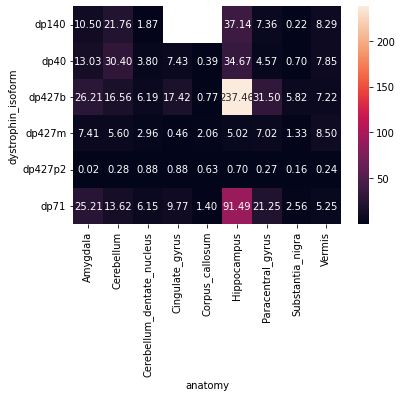

In [16]:
# set value types from string to float and plot a default heatmap
result = result.astype(np.float32)
sns.heatmap(result, annot=True, fmt='.2f')

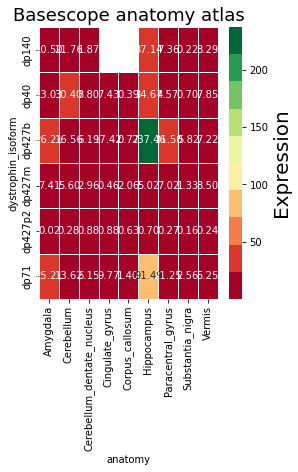

In [17]:
# embellish the plot: Define the plot 
plt.figure(figsize = [4, 5])

# set the font size and the distance of the title from the plot
title = 'Basescope anatomy atlas'
plt.title(title,fontsize=18)

ax = sns.heatmap(result, annot = True, fmt='.2f', linewidths = .5,
                 cmap = plt.cm.get_cmap('RdYlGn', 10), cbar_kws={
                     'label': 'Expression', 'shrink': 1})

# this sets a label, size 20 to your color bar
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

<AxesSubplot:xlabel='anatomy', ylabel='anatomy'>

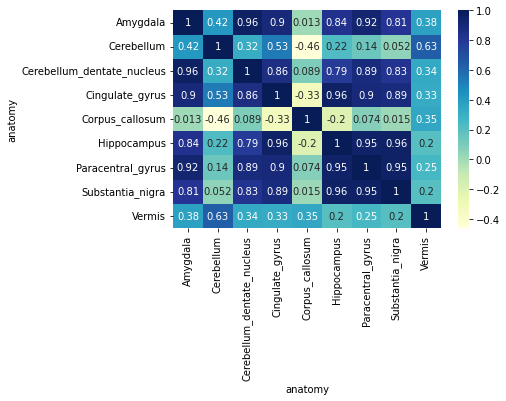

In [18]:
# change color and display the correlation among anatomical areas 
sns.heatmap(result.corr(), cmap="YlGnBu", annot=True)

---

### WP2 - Single cell

#### Query 10:  What cells are expressing dystrophin across the brain areas?  
sparql.setQuery("""
PREFIX sio: <http://semanticscience.org/resource/>
PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

    select ?gene_uri ?anatomy_uri ?cell_type ?expression
    where { 
        ?mouse a obo:NCBITaxon_10090 ;
                sio:SIO_000228 ?role .
        ?role a obo:OBI_0002493, sio:SIO_000016 ;
              sio:SIO_000356 ?rna_process .
        ?rna_process a obo:OBI_0002631, sio:SIO_000006 ;
                      sio:SIO_000291 ?transcript_uri ;
                      sio:SIO_000229 ?normalized_expression_uri ;
                      sio:SIO_000230 ?cell_uri .
        ?transcript_uri a sio:SIO_010450, obo:SO_0000673 ;
                        sio:SIO_010079 ?gene_uri .
    FILTER(?gene_uri = <https://rdf.biosemantics.org/resources/bind/wp2/gene/Dmd>)
        ?normalized_expression_uri a sio:SIO_000015, obo:NCIT_C184799 ;
                                   sio:SIO_000008 [a obo:NCIT_C181341, sio:SIO_000614] ;
                sio:SIO_000300 ?expression .
	FILTER(?expression > 0.0) 
    ?cell_uri a ?cell_type ;  
                sio:SIO_000068 ?anatomy_uri .
    FILTER(?cell_type != sio:SIO_010001) 
    ?anatomy_uri a obo:UBERON_0002616 .
} 
    """
)

In [13]:
# read data file
data_df = pd.read_csv('./query-result-wp2-singlecell-10.tsv', sep='\t')
print(data_df.shape)
data_df.head()

(1, 4)


?gene_uri  \
0  <https://rdf.biosemantics.org/resources/bind/g...   

                                        ?anatomy_uri  \
0  <https://rdf.biosemantics.org/resources/bind/w...   

                                    ?cell_type  \
0  <http://purl.obolibrary.org/obo/CL_0000548>   

                                         ?expression  
0  1.09861228866811^^<http://www.w3.org/2001/XMLS...

In [14]:
# format cell values
data_df.columns

Index(['?gene_uri', '?anatomy_uri', '?cell_type', '?expression'], dtype='object')

In [15]:
data_df["dystrophin"] = data_df["?gene_uri"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
data_df["anatomy"] = data_df["?anatomy_uri"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
data_df["cell_type"] = data_df["?cell_type"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
data_df["expression"] = data_df["?expression"].str.rsplit('^^', 1, expand=True)[0]
data_df

?gene_uri  \
0  <https://rdf.biosemantics.org/resources/bind/g...   

                                        ?anatomy_uri  \
0  <https://rdf.biosemantics.org/resources/bind/w...   

                                    ?cell_type  \
0  <http://purl.obolibrary.org/obo/CL_0000548>   

                                         ?expression dystrophin anatomy  \
0  1.09861228866811^^<http://www.w3.org/2001/XMLS...        Dmd  cortex   

    cell_type        expression  
0  CL_0000548  1.09861228866811

In [16]:
# subset the columns to plot
table_df = data_df[['dystrophin', 'anatomy', 'cell_type', 'expression']]
table_df

dystrophin anatomy   cell_type        expression
0        Dmd  cortex  CL_0000548  1.09861228866811

#### Query 11: What genes are differentially expressed across mouse models for each cell type and anatomical area?  
sparql.setQuery("""

PREFIX obo: <http://purl.obolibrary.org/obo/>  

PREFIX sio: <http://semanticscience.org/resource/>  
 

select ?celltype ?anat ?mousemodel ?role ?gene ?val 

where {   

   ?anat a sio:SIO_001262.  

    ?cell a sio:SIO_010001.  

    ?cell sio:SIO_000068 ?anat.  

    ?cell a ?celltype.  

    FILTER(?celltype !=  sio:SIO_010001).  

    ?mouse a obo:NCBITaxon_10090; 

           sio:SIO_000228 ?role; 

           sio:SIO_000008 ?genotype. 

    ?genotype a obo:SO_0001027; 

              sio:SIO_000300 ?mousemodel. 

    ?process a obo:OBI_0002631; 

             sio:SIO_000291 ?rna.   

    ?process sio:SIO_000230 ?cell.  

    ?process sio:SIO_000229 ?out.  

    ?out sio:SIO_000008 ?normalized.  

    ?normalized a obo:NCIT_C181341.  

    ?out sio:SIO_000300 ?val.    

    ?rna sio:SIO_010079 ?gene. 

    FILTER (?val > 0)     

} 
    """
)

In [48]:
# read data file 
data_df = pd.read_csv('./query-result-wp2-singlecell-11.tsv', sep='\t')
print(data_df.shape)
data_df.head()

(62, 6)


?celltype  \
0  <http://purl.obolibrary.org/obo/CL_0000120>   
1  <http://purl.obolibrary.org/obo/CL_0000120>   
2  <http://purl.obolibrary.org/obo/CL_0000120>   
3  <http://purl.obolibrary.org/obo/CL_0000120>   
4  <http://purl.obolibrary.org/obo/CL_0000120>   

                                               ?anat ?mousemodel  \
0  <https://rdf.biosemantics.org/resources/bind/w...      mdx5CV   
1  <https://rdf.biosemantics.org/resources/bind/w...         5CV   
2  <https://rdf.biosemantics.org/resources/bind/w...          WT   
3  <https://rdf.biosemantics.org/resources/bind/w...         5CV   
4  <https://rdf.biosemantics.org/resources/bind/w...          WT   

                                               ?role  \
0  <https://rdf.biosemantics.org/resources/bind/r...   
1  <https://rdf.biosemantics.org/resources/bind/r...   
2  <https://rdf.biosemantics.org/resources/bind/r...   
3  <https://rdf.biosemantics.org/resources/bind/r...   
4  <https://rdf.biosemantics.org/resources/bind/r...   

                                               ?gene  \
0  <https://rdf.biosemantics.org/resources/bind/g...   
1  <https://rdf.biosemantics.org/resources/bind/g...   
2  <https://rdf.biosemantics.org/resources/bind/g...   
3  <https://rdf.biosemantics.org/resources/bind/g...   
4  <https://rdf.biosemantics.org/resources/bind/g...   

                                                ?val  
0  1.38629436111989^^<http://www.w3.org/2001/XMLS...  
1  1.38629436111989^^<http://www.w3.org/2001/XMLS...  
2  1.38629436111989^^<http://www.w3.org/2001/XMLS...  
3  1.38629436111989^^<http://www.w3.org/2001/XMLS...  
4  1.38629436111989^^<http://www.w3.org/2001/XMLS...

In [49]:
# format cell values
data_df.columns

Index(['?celltype', '?anat', '?mousemodel', '?role', '?gene', '?val'], dtype='object')

In [50]:
data_df["role"] = data_df["?role"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
data_df["gene"] = data_df["?gene"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
data_df["anat"] = data_df["?anat"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
data_df["celltype"] = data_df["?celltype"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
data_df["val"] = data_df["?val"].str.rsplit('^^', 1, expand=True)[0]
data_df["mousemodel"] = data_df["?mousemodel"]
data_df

?celltype  \
0   <http://purl.obolibrary.org/obo/CL_0000120>   
1   <http://purl.obolibrary.org/obo/CL_0000120>   
2   <http://purl.obolibrary.org/obo/CL_0000120>   
3   <http://purl.obolibrary.org/obo/CL_0000120>   
4   <http://purl.obolibrary.org/obo/CL_0000120>   
..                                          ...   
57  <http://purl.obolibrary.org/obo/CL_0000548>   
58  <http://purl.obolibrary.org/obo/CL_0000548>   
59  <http://purl.obolibrary.org/obo/CL_0000548>   
60  <http://purl.obolibrary.org/obo/CL_0000548>   
61  <http://purl.obolibrary.org/obo/CL_0000548>   

                                                ?anat ?mousemodel  \
0   <https://rdf.biosemantics.org/resources/bind/w...      mdx5CV   
1   <https://rdf.biosemantics.org/resources/bind/w...         5CV   
2   <https://rdf.biosemantics.org/resources/bind/w...          WT   
3   <https://rdf.biosemantics.org/resources/bind/w...         5CV   
4   <https://rdf.biosemantics.org/resources/bind/w...          WT   
..                                                ...         ...   
57  <https://rdf.biosemantics.org/resources/bind/w...          WT   
58  <https://rdf.biosemantics.org/resources/bind/w...          WT   
59  <https://rdf.biosemantics.org/resources/bind/w...         5CV   
60  <https://rdf.biosemantics.org/resources/bind/w...          WT   
61  <https://rdf.biosemantics.org/resources/bind/w...      mdx4cv   

                                                ?role  \
0   <https://rdf.biosemantics.org/resources/bind/r...   
1   <https://rdf.biosemantics.org/resources/bind/r...   
2   <https://rdf.biosemantics.org/resources/bind/r...   
3   <https://rdf.biosemantics.org/resources/bind/r...   
4   <https://rdf.biosemantics.org/resources/bind/r...   
..                                                ...   
57  <https://rdf.biosemantics.org/resources/bind/r...   
58  <https://rdf.biosemantics.org/resources/bind/r...   
59  <https://rdf.biosemantics.org/resources/bind/r...   
60  <https://rdf.biosemantics.org/resources/bind/r...   
61  <https://rdf.biosemantics.org/resources/bind/w...   

                                                ?gene  \
0   <https://rdf.biosemantics.org/resources/bind/g...   
1   <https://rdf.biosemantics.org/resources/bind/g...   
2   <https://rdf.biosemantics.org/resources/bind/g...   
3   <https://rdf.biosemantics.org/resources/bind/g...   
4   <https://rdf.biosemantics.org/resources/bind/g...   
..                                                ...   
57  <https://rdf.biosemantics.org/resources/bind/g...   
58  <https://rdf.biosemantics.org/resources/bind/g...   
59  <https://rdf.biosemantics.org/resources/bind/g...   
60  <https://rdf.biosemantics.org/resources/bind/g...   
61  <https://rdf.biosemantics.org/resources/bind/g...   

                                                 ?val  \
0   1.38629436111989^^<http://www.w3.org/2001/XMLS...   
1   1.38629436111989^^<http://www.w3.org/2001/XMLS...   
2   1.38629436111989^^<http://www.w3.org/2001/XMLS...   
3   1.38629436111989^^<http://www.w3.org/2001/XMLS...   
4   1.38629436111989^^<http://www.w3.org/2001/XMLS...   
..                                                ...   
57  1.09861228866811^^<http://www.w3.org/2001/XMLS...   
58  1.09861228866811^^<http://www.w3.org/2001/XMLS...   
59  1.09861228866811^^<http://www.w3.org/2001/XMLS...   
60  1.09861228866811^^<http://www.w3.org/2001/XMLS...   
61  1.09861228866811^^<http://www.w3.org/2001/XMLS...   

                              role    gene    anat    celltype  \
0             MOUSE_36_OBI_0002492  Mrpl15  cortex  CL_0000120   
1             MOUSE_37_OBI_0002492  Mrpl15  cortex  CL_0000120   
2             MOUSE_38_OBI_0002493  Mrpl15  cortex  CL_0000120   
3             MOUSE_39_OBI_0002492  Mrpl15  cortex  CL_0000120   
4             MOUSE_40_OBI_0002493  Mrpl15  cortex  CL_0000120   
..                             ...     ...     ...         ...   
57            MOUSE_73_OBI_0002493     Dmd  cortex  CL_0000548   
58           

In [51]:
# subset the columns to plot
data_df =data_df[['celltype', 'anat', 'mousemodel', 'role', 'gene', 'val']]
data_df

celltype    anat mousemodel                            role    gene  \
0   CL_0000120  cortex     mdx5CV            MOUSE_36_OBI_0002492  Mrpl15   
1   CL_0000120  cortex        5CV            MOUSE_37_OBI_0002492  Mrpl15   
2   CL_0000120  cortex         WT            MOUSE_38_OBI_0002493  Mrpl15   
3   CL_0000120  cortex        5CV            MOUSE_39_OBI_0002492  Mrpl15   
4   CL_0000120  cortex         WT            MOUSE_40_OBI_0002493  Mrpl15   
..         ...     ...        ...                             ...     ...   
57  CL_0000548  cortex         WT            MOUSE_73_OBI_0002493     Dmd   
58  CL_0000548  cortex         WT            MOUSE_74_OBI_0002493     Dmd   
59  CL_0000548  cortex        5CV            MOUSE_75_OBI_0002492     Dmd   
60  CL_0000548  cortex         WT  MOUSE_CNRS-bat1-35_OBI_0002493     Dmd   
61  CL_0000548  cortex     mdx4cv        MOUSE_cmdx4c_OBI_0002493     Dmd   

                 val  
0   1.38629436111989  
1   1.38629436111989  
2   1.38629436111989  
3   1.38629436111989  
4   1.38629436111989  
..               ...  
57  1.09861228866811  
58  1.09861228866811  
59  1.09861228866811  
60  1.09861228866811  
61  1.09861228866811  

[62 rows x 6 columns]

---

### WP2: basescope-single cell
#### Query 19:  What anatomical areas show concordant dystrophin expression in single cell and RNA/BaseScope data?  
sparql.setQuery("""
 

    """
)

**WITH THE CURRENT DATA I CANNOT CALCULATE**

In [17]:
# dummy dataframe
dataq19_df = heatmap_df[['dystrophin_isoform', 'anatomy', 'expression']].assign(experiment=['sc','sc','sc','sc','sc','basescope','basescope','basescope','basescope','basescope'])
dataq19_df

dystrophin_isoform     anatomy expression experiment
0               dp41  Cerebellum        0.0         sc
1               dp42  Cerebellum       0.42         sc
2              dp420  Cerebellum      22.34         sc
3               dp43  Cerebellum      12.39         sc
4             dp427b  Cerebellum       0.09         sc
5               dp41      Cortex       0.87  basescope
6               dp42      Cortex       0.55  basescope
7              dp420      Cortex      23.54  basescope
8               dp43      Cortex      10.79  basescope
9             dp427b      Cortex       0.06  basescope

In [24]:
# split dataframe by row
sc_df = dataq19_df.iloc[:5, :]
bc_df = dataq19_df.iloc[5:, :]
sc_df

dystrophin_isoform     anatomy expression experiment
0               dp41  Cerebellum        0.0         sc
1               dp42  Cerebellum       0.42         sc
2              dp420  Cerebellum      22.34         sc
3               dp43  Cerebellum      12.39         sc
4             dp427b  Cerebellum       0.09         sc

In [25]:
bc_df

dystrophin_isoform anatomy expression experiment
5               dp41  Cortex       0.87  basescope
6               dp42  Cortex       0.55  basescope
7              dp420  Cortex      23.54  basescope
8               dp43  Cortex      10.79  basescope
9             dp427b  Cortex       0.06  basescope

In [26]:
# change anatomy to Cerebellum to compare with single cell
bc_df['anatomy'] = ['Cerebellum']*5
bc_df

/tmp/ipykernel_617906/4286002535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_df['anatomy'] = ['Cerebellum']*5


dystrophin_isoform     anatomy expression experiment
5               dp41  Cerebellum       0.87  basescope
6               dp42  Cerebellum       0.55  basescope
7              dp420  Cerebellum      23.54  basescope
8               dp43  Cerebellum      10.79  basescope
9             dp427b  Cerebellum       0.06  basescope

In [27]:
# create a column for the anatomy-dystrophin X_axis
sc_df['x_axis'] = sc_df[['anatomy','dystrophin_isoform']].agg('-'.join, axis=1)
sc_df

/tmp/ipykernel_617906/1376301790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_df['x_axis'] = sc_df[['anatomy','dystrophin_isoform']].agg('-'.join, axis=1)


dystrophin_isoform     anatomy expression experiment             x_axis
0               dp41  Cerebellum        0.0         sc    Cerebellum-dp41
1               dp42  Cerebellum       0.42         sc    Cerebellum-dp42
2              dp420  Cerebellum      22.34         sc   Cerebellum-dp420
3               dp43  Cerebellum      12.39         sc    Cerebellum-dp43
4             dp427b  Cerebellum       0.09         sc  Cerebellum-dp427b

In [28]:
bc_df['x_axis'] = bc_df[['anatomy','dystrophin_isoform']].agg('-'.join, axis=1)
bc_df

/tmp/ipykernel_617906/4085776461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_df['x_axis'] = bc_df[['anatomy','dystrophin_isoform']].agg('-'.join, axis=1)


dystrophin_isoform     anatomy expression experiment             x_axis
5               dp41  Cerebellum       0.87  basescope    Cerebellum-dp41
6               dp42  Cerebellum       0.55  basescope    Cerebellum-dp42
7              dp420  Cerebellum      23.54  basescope   Cerebellum-dp420
8               dp43  Cerebellum      10.79  basescope    Cerebellum-dp43
9             dp427b  Cerebellum       0.06  basescope  Cerebellum-dp427b

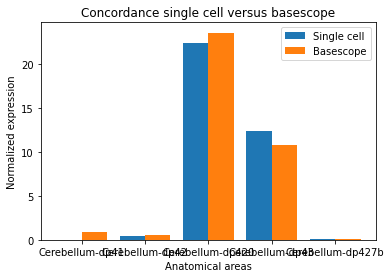

In [29]:
# bar plots
plt.figure(figsize = [8, 5])

anatomy = list(sc_df['x_axis'].drop_duplicates())
single_cell = list(sc_df['expression'].astype(np.float32))
basescope = list(bc_df['expression'].astype(np.float32))

X_axis = np.arange(len(anatomy))

plt.bar(X_axis - 0.2, single_cell, 0.4, label = 'Single cell')
plt.bar(X_axis + 0.2, basescope, 0.4, label = 'Basescope')
  
plt.xticks(X_axis, anatomy)
plt.xlabel("Anatomical areas")
plt.ylabel("Normalized expression")
plt.title("Concordance single cell versus basescope")
plt.legend()
plt.show()

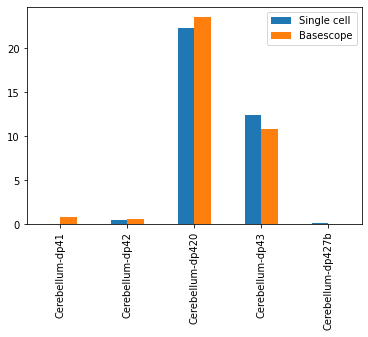

In [30]:
# bar plots
anatomy = list(sc_df['x_axis'].drop_duplicates())
single_cell = list(sc_df['expression'].astype(np.float32))
basescope = list(bc_df['expression'].astype(np.float32))

df = pd.DataFrame({'Single cell': single_cell,

                   'Basescope': basescope}, index=anatomy)

ax = df.plot.bar()

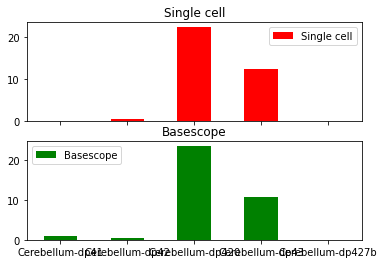

In [31]:
axes = df.plot.bar(

    rot=0, subplots=True, color={"Single cell": "red", "Basescope": "green"}

)

axes[1].legend(loc=2)  

---
## From SPARQL API
### WP2 - Basescope

#### Query 6: Provide a table/graph/heatmap with the presence of dystrophin isoform expression by anatomical area 

In [57]:
# let's play with SPARQLWrapper

# access the SPARQL endpoint API
sparql = SPARQLWrapper2(
    "https://graphdb.dev.biosemantics.semlab-leiden.nl/repositories/BIND"
)
sparql.setHTTPAuth(BASIC)
sparql.setCredentials("nuria", "bi0_GraphDB")
sparql.setReturnFormat(JSON)


# via a SPARQL endpoint
sparql.setQuery("""
    PREFIX sio: <http://semanticscience.org/resource/>
    PREFIX obo: <http://purl.obolibrary.org/obo/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    
    select DISTINCT ?dystrophin_isoform ?expression ?anatomy
    where { 
        ?person a sio:SIO_010375, obo:NCBITaxon_9606 ;
                sio:SIO_000228 ?role .
        ?role a obo:OBIB_0000484, sio:SIO_000016 ;
              sio:SIO_000356 ?rna_process .
        ?rna_process a obo:OBI_0003094, sio:SIO_000006 ;
                  sio:SIO_000291 ?dystrophin_isoform ;
                  sio:SIO_000229 ?detection ;
                  sio:SIO_000230 ?sample .
        ?detection sio:SIO_000300 ?expression .
        ?sampling_process a obo:OBI_0000977, sio:SIO_000006, obo:NCIT_C143028 ;
                sio:SIO_000229 ?sample ;
                sio:SIO_000230 ?anatomy, ?subanatomy .
        ?anatomy a obo:UBERON_0002037, obo:UBERON_0002616, sio:SIO_010046 . 
} 
limit 5 
    """
)

for result in sparql.query().bindings:
    print(f"{result['dystrophin_isoform'].value}, {result['expression'].value}, {result['expression'].datatype}")

https://rdf.biosemantics.org/resources/bind/isoform/dp140, 0.0, http://www.w3.org/2001/XMLSchema#float
https://rdf.biosemantics.org/resources/bind/isoform/dp140, 3.83, http://www.w3.org/2001/XMLSchema#float
https://rdf.biosemantics.org/resources/bind/isoform/dp140, 0.11, http://www.w3.org/2001/XMLSchema#float
https://rdf.biosemantics.org/resources/bind/isoform/dp140, 0.18, http://www.w3.org/2001/XMLSchema#float
https://rdf.biosemantics.org/resources/bind/isoform/dp40, 7.2, http://www.w3.org/2001/XMLSchema#float


In [33]:
# access the SPARQL endpoint API
sparql = SPARQLWrapper(
    "https://graphdb.dev.biosemantics.semlab-leiden.nl/repositories/BIND"
)
sparql.setHTTPAuth(BASIC)
sparql.setCredentials("nuria", "bi0_GraphDB")
sparql.setReturnFormat(JSON)


# via a SPARQL endpoint
sparql.setQuery("""
    PREFIX sio: <http://semanticscience.org/resource/>
    PREFIX obo: <http://purl.obolibrary.org/obo/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    
    select DISTINCT ?dystrophin_isoform ?expression ?anatomy
    where { 
        ?person a sio:SIO_010375, obo:NCBITaxon_9606 ;
                sio:SIO_000228 ?role .
        ?role a obo:OBIB_0000484, sio:SIO_000016 ;
              sio:SIO_000356 ?rna_process .
        ?rna_process a obo:OBI_0003094, sio:SIO_000006 ;
                  sio:SIO_000291 ?dystrophin_isoform ;
                  sio:SIO_000229 ?detection ;
                  sio:SIO_000230 ?sample .
        ?detection sio:SIO_000300 ?expression .
        ?sampling_process a obo:OBI_0000977, sio:SIO_000006, obo:NCIT_C143028 ;
                sio:SIO_000229 ?sample ;
                sio:SIO_000230 ?anatomy, ?subanatomy .
        ?anatomy a obo:UBERON_0002037, obo:UBERON_0002616, sio:SIO_010046 . 
} 
limit 5 
    """
)

try:
    ret = sparql.queryAndConvert()
    results = sparql.query().convert()

    for r in ret["results"]["bindings"]:
        print(r)
except Exception as e:
    print(e)

{'dystrophin_isoform': {'type': 'uri', 'value': 'https://rdf.biosemantics.org/resources/bind/isoform/dp140'}, 'expression': {'datatype': 'http://www.w3.org/2001/XMLSchema#float', 'type': 'literal', 'value': '0.0'}, 'anatomy': {'type': 'uri', 'value': 'https://rdf.biosemantics.org/resources/bind/anatomy/Cerebellum'}}
{'dystrophin_isoform': {'type': 'uri', 'value': 'https://rdf.biosemantics.org/resources/bind/isoform/dp140'}, 'expression': {'datatype': 'http://www.w3.org/2001/XMLSchema#float', 'type': 'literal', 'value': '3.83'}, 'anatomy': {'type': 'uri', 'value': 'https://rdf.biosemantics.org/resources/bind/anatomy/Cerebellum'}}
{'dystrophin_isoform': {'type': 'uri', 'value': 'https://rdf.biosemantics.org/resources/bind/isoform/dp140'}, 'expression': {'datatype': 'http://www.w3.org/2001/XMLSchema#float', 'type': 'literal', 'value': '0.11'}, 'anatomy': {'type': 'uri', 'value': 'https://rdf.biosemantics.org/resources/bind/anatomy/Cerebellum'}}
{'dystrophin_isoform': {'type': 'uri', 'valu

In [34]:
print(results)

{'head': {'vars': ['dystrophin_isoform', 'expression', 'anatomy']}, 'results': {'bindings': [{'dystrophin_isoform': {'type': 'uri', 'value': 'https://rdf.biosemantics.org/resources/bind/isoform/dp140'}, 'expression': {'datatype': 'http://www.w3.org/2001/XMLSchema#float', 'type': 'literal', 'value': '0.0'}, 'anatomy': {'type': 'uri', 'value': 'https://rdf.biosemantics.org/resources/bind/anatomy/Cerebellum'}}, {'dystrophin_isoform': {'type': 'uri', 'value': 'https://rdf.biosemantics.org/resources/bind/isoform/dp140'}, 'expression': {'datatype': 'http://www.w3.org/2001/XMLSchema#float', 'type': 'literal', 'value': '3.83'}, 'anatomy': {'type': 'uri', 'value': 'https://rdf.biosemantics.org/resources/bind/anatomy/Cerebellum'}}, {'dystrophin_isoform': {'type': 'uri', 'value': 'https://rdf.biosemantics.org/resources/bind/isoform/dp140'}, 'expression': {'datatype': 'http://www.w3.org/2001/XMLSchema#float', 'type': 'literal', 'value': '0.11'}, 'anatomy': {'type': 'uri', 'value': 'https://rdf.bio

In [35]:
# query results to clean dataframe
ret_list = ret["results"]["bindings"]
new_results_list = query_to_dataframe(ret_list)
df = pd.DataFrame.from_dict(new_results_list)
df

dystrophin_isoform expression  \
0  https://rdf.biosemantics.org/resources/bind/is...        0.0   
1  https://rdf.biosemantics.org/resources/bind/is...       3.83   
2  https://rdf.biosemantics.org/resources/bind/is...       0.11   
3  https://rdf.biosemantics.org/resources/bind/is...       0.18   
4  https://rdf.biosemantics.org/resources/bind/is...        7.2   

                                             anatomy  
0  https://rdf.biosemantics.org/resources/bind/an...  
1  https://rdf.biosemantics.org/resources/bind/an...  
2  https://rdf.biosemantics.org/resources/bind/an...  
3  https://rdf.biosemantics.org/resources/bind/an...  
4  https://rdf.biosemantics.org/resources/bind/an...

In [36]:
df.describe()

dystrophin_isoform expression  \
count                                                   5          5   
unique                                                  2          5   
top     https://rdf.biosemantics.org/resources/bind/is...        0.0   
freq                                                    4          1   

                                                  anatomy  
count                                                   5  
unique                                                  1  
top     https://rdf.biosemantics.org/resources/bind/an...  
freq                                                    5

<AxesSubplot:>

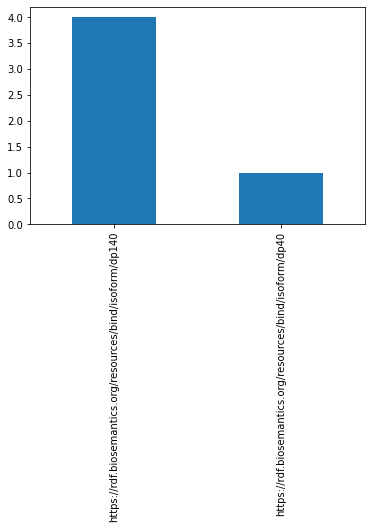

In [37]:
df['dystrophin_isoform'].value_counts().plot(kind='bar')

---
## QUERY ANALYSIS
### WP2 - Basescope

#### Query 6: Provide a table/graph/heatmap with the presence of dystrophin isoform expression by anatomical area 

In [3]:
# let's do the query and analysis from the beginning

# access the SPARQL endpoint API
sparql = SPARQLWrapper(
    "https://graphdb.dev.biosemantics.semlab-leiden.nl/repositories/BIND"
)
sparql.setHTTPAuth(BASIC)
sparql.setCredentials("nuria", "bi0_GraphDB")
sparql.setReturnFormat(JSON)


# via a SPARQL endpoint
sparql.setQuery("""

PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX sio: <http://semanticscience.org/resource/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT * WHERE
{ 
{
   select DISTINCT ?anat ?dystrophin (AVG(?val) AS ?avg_val) where { 
    ?exp a obo:NCIT_C15783.
    ?exp sio:SIO_000300 ?val.
    ?process sio:SIO_000229 ?exp.
    ?process sio:SIO_000230 ?sample.
    ?process sio:SIO_000291 ?dystrophin.
    ?sprocess sio:SIO_000229 ?sample.
    ?sprocess sio:SIO_000230 ?anat. 
    ?anat sio:SIO_000068 ?person.
    ?person a obo:NCBITaxon_9606.
} GROUP BY ?anat ?dystrophin 
}
UNION
{
    select DISTINCT ?anat ?dystrophin (AVG(?val) AS ?avg_val) where { 
    ?exp a obo:NCIT_C15783.
    ?exp sio:SIO_000300 ?val.
    ?process sio:SIO_000229 ?exp.
    ?process sio:SIO_000230 ?sample.
    ?process sio:SIO_000291 ?dystrophin.
    ?sprocess sio:SIO_000229 ?sample.
    ?sprocess sio:SIO_000230 ?layer.
    ?layer sio:SIO_000068 ?anat.
    ?anat sio:SIO_000068 ?person.
    ?person a obo:NCBITaxon_9606.
} GROUP BY ?anat ?dystrophin 
}
}
    """
)

try:
    res = sparql.queryAndConvert()
except Exception as e:
    print(e)

# let's do the query and analysis from the beginning

# access the SPARQL endpoint API
sparql = SPARQLWrapper(
    "https://graphdb.dev.biosemantics.semlab-leiden.nl/repositories/BIND"
)
sparql.setHTTPAuth(BASIC)
sparql.setCredentials("nuria", "bi0_GraphDB")
sparql.setReturnFormat(JSON)


# via a SPARQL endpoint
sparql.setQuery("""

    PREFIX sio: <http://semanticscience.org/resource/>
    PREFIX obo: <http://purl.obolibrary.org/obo/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    
select DISTINCT ?anatomy ?dystrophin_isoform ?expression
    where { 
        ?person a sio:SIO_010375, obo:NCBITaxon_9606 ;
                sio:SIO_000228 ?role .
        ?role a obo:OBIB_0000484, sio:SIO_000016 ;
              sio:SIO_000356 ?rna_process .
        ?rna_process a obo:OBI_0003094, sio:SIO_000006 ;
                  sio:SIO_000291 ?dystrophin_isoform ;
                  sio:SIO_000229 ?detection ;
                  sio:SIO_000230 ?sample .
        ?detection sio:SIO_000300 ?expression .
        ?sampling_process a obo:OBI_0000977, sio:SIO_000006, obo:NCIT_C143028 ;
                sio:SIO_000229 ?sample ;
                sio:SIO_000230 ?anatomy, ?subanatomy .
        ?anatomy a obo:UBERON_0002616, sio:SIO_010046 . 
        ?subanatomy sio:SIO_000068 ?anatomy .
        ?person a obo:NCBITaxon_9606 . 
} 
    """
)

try:
    res = sparql.queryAndConvert()
except Exception as e:
    print(e)

    PREFIX sio: <http://semanticscience.org/resource/>
    PREFIX obo: <http://purl.obolibrary.org/obo/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    
select DISTINCT ?anatomy ?dystrophin_isoform (avg(?expression) as ?val)
    where { 
        ?person a sio:SIO_010375, obo:NCBITaxon_9606 ;
                sio:SIO_000228 ?role .
        ?role a obo:OBIB_0000484, sio:SIO_000016 ;
              sio:SIO_000356 ?rna_process .
        ?rna_process a obo:OBI_0003094, sio:SIO_000006 ;
                  sio:SIO_000291 ?dystrophin_isoform ;
                  sio:SIO_000229 ?detection ;
                  sio:SIO_000230 ?sample .
        ?detection sio:SIO_000300 ?expression .
        ?sampling_process a obo:OBI_0000977, sio:SIO_000006, obo:NCIT_C143028 ;
                sio:SIO_000229 ?sample ;
                sio:SIO_000230 ?anatomy, ?subanatomy .
        ?anatomy a obo:UBERON_0002616, sio:SIO_010046 . 
        ?subanatomy sio:SIO_000068 ?anatomy .
        ?person a obo:NCBITaxon_9606 . 
} group by ?anatomy ?dystrophin_isoform

In [4]:
# query results to clean dataframe
res_list = res["results"]["bindings"]
new_res_list = query_to_dataframe(res_list)
q6_df = pd.DataFrame.from_dict(new_res_list)
q6_df

anat  \
0   https://rdf.biosemantics.org/resources/bind/an...   
1   https://rdf.biosemantics.org/resources/bind/an...   
2   https://rdf.biosemantics.org/resources/bind/an...   
3   https://rdf.biosemantics.org/resources/bind/an...   
4   https://rdf.biosemantics.org/resources/bind/an...   
5   https://rdf.biosemantics.org/resources/bind/an...   
6   https://rdf.biosemantics.org/resources/bind/an...   
7   https://rdf.biosemantics.org/resources/bind/an...   
8   https://rdf.biosemantics.org/resources/bind/an...   
9   https://rdf.biosemantics.org/resources/bind/an...   
10  https://rdf.biosemantics.org/resources/bind/an...   
11  https://rdf.biosemantics.org/resources/bind/an...   
12  https://rdf.biosemantics.org/resources/bind/an...   
13  https://rdf.biosemantics.org/resources/bind/an...   
14  https://rdf.biosemantics.org/resources/bind/an...   
15  https://rdf.biosemantics.org/resources/bind/an...   
16  https://rdf.biosemantics.org/resources/bind/an...   
17  https://rdf.biosemantics.org/resources/bind/an...   
18  https://rdf.biosemantics.org/resources/bind/an...   
19  https://rdf.biosemantics.org/resources/bind/an...   
20  https://rdf.biosemantics.org/resources/bind/an...   
21  https://rdf.biosemantics.org/resources/bind/an...   
22  https://rdf.biosemantics.org/resources/bind/an...   
23  https://rdf.biosemantics.org/resources/bind/an...   
24  https://rdf.biosemantics.org/resources/bind/an...   
25  https://rdf.biosemantics.org/resources/bind/an...   
26  https://rdf.biosemantics.org/resources/bind/an...   
27  https://rdf.biosemantics.org/resources/bind/an...   
28  https://rdf.biosemantics.org/resources/bind/an...   
29  https://rdf.biosemantics.org/resources/bind/an...   
30  https://rdf.biosemantics.org/resources/bind/an...   
31  https://rdf.biosemantics.org/resources/bind/an...   
32  https://rdf.biosemantics.org/resources/bind/an...   
33  https://rdf.biosemantics.org/resources/bind/an...   
34  https://rdf.biosemantics.org/resources/bind/an...   
35  https://rdf.biosemantics.org/resources/bind/an...   
36  https://rdf.biosemantics.org/resources/bind/an...   
37  https://rdf.biosemantics.org/resources/bind/an...   
38  https://rdf.biosemantics.org/resources/bind/an...   
39  https://rdf.biosemantics.org/resources/bind/an...   
40  https://rdf.biosemantics.org/resources/bind/an...   
41  https://rdf.biosemantics.org/resources/bind/an...   
42  https://rdf.biosemantics.org/resources/bind/an...   
43  https://rdf.biosemantics.org/resources/bind/an...   
44  https://rdf.biosemantics.org/resources/bind/an...   
45  https://rdf.biosemantics.org/resources/bind/an...   
46  https://rdf.biosemantics.org/resources/bind/an...   
47  https://rdf.biosemantics.org/resources/bind/an...   
48  https://rdf.biosemantics.org/resources/bind/an...   
49  https://rdf.biosemantics.org/resources/bind/an...   
50  https://rdf.biosemantics.org/resources/bind/an...   
51  https://rdf.biosemantics.org/resources/bind/an...   
52  https://rdf.biosemantics.org/resources/bind/an...   
53  https://rdf.biosemantics.org/resources/bind/an...   

                                           dystrophin      avg_val  
0   https://rdf.biosemantics.org/resources/bind/is...    10.503334  
1   https://rdf.biosemantics.org/resources/bind/is...    13.033334  
2   https://rdf.biosemantics.org/resources/bind/is...    7.4100013  
3   https://rdf.biosemantics.org/resources/bind/is...  0.016666668  
4   https://rdf.biosemantics.org/resources/bind/is...    25.213331  
5   https://rdf.biosemantics.org/resources/bind/is...        26.21  
6   https://rdf.biosemantics.org/resources/bind/is...    1.8666666  
7   https://rdf.biosemantics.org/resources/bind/is...    3.8000002  
8   https://rdf.biosemantics.org/resources/bind/is...    2.9633334  
9   https://rdf.biosemantics.org/resources/bind/is...    0.8766666  
10  https://rdf.biosemantics.org/resources/bind/is...         6.15  
11  https://rdf.biosemantics.org/resources/bind/is...     6.193333  
12  https://rdf.

In [5]:
# format cell values
q6_df.columns

Index(['anat', 'dystrophin', 'avg_val'], dtype='object')

In [6]:
q6_df["isoform"] = q6_df["dystrophin"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
q6_df["expression"] = q6_df["avg_val"].str.rsplit('^^', 1, expand=True)[0]
q6_df["anatomy"] = q6_df["anat"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
q6_df

anat  \
0   https://rdf.biosemantics.org/resources/bind/an...   
1   https://rdf.biosemantics.org/resources/bind/an...   
2   https://rdf.biosemantics.org/resources/bind/an...   
3   https://rdf.biosemantics.org/resources/bind/an...   
4   https://rdf.biosemantics.org/resources/bind/an...   
5   https://rdf.biosemantics.org/resources/bind/an...   
6   https://rdf.biosemantics.org/resources/bind/an...   
7   https://rdf.biosemantics.org/resources/bind/an...   
8   https://rdf.biosemantics.org/resources/bind/an...   
9   https://rdf.biosemantics.org/resources/bind/an...   
10  https://rdf.biosemantics.org/resources/bind/an...   
11  https://rdf.biosemantics.org/resources/bind/an...   
12  https://rdf.biosemantics.org/resources/bind/an...   
13  https://rdf.biosemantics.org/resources/bind/an...   
14  https://rdf.biosemantics.org/resources/bind/an...   
15  https://rdf.biosemantics.org/resources/bind/an...   
16  https://rdf.biosemantics.org/resources/bind/an...   
17  https://rdf.biosemantics.org/resources/bind/an...   
18  https://rdf.biosemantics.org/resources/bind/an...   
19  https://rdf.biosemantics.org/resources/bind/an...   
20  https://rdf.biosemantics.org/resources/bind/an...   
21  https://rdf.biosemantics.org/resources/bind/an...   
22  https://rdf.biosemantics.org/resources/bind/an...   
23  https://rdf.biosemantics.org/resources/bind/an...   
24  https://rdf.biosemantics.org/resources/bind/an...   
25  https://rdf.biosemantics.org/resources/bind/an...   
26  https://rdf.biosemantics.org/resources/bind/an...   
27  https://rdf.biosemantics.org/resources/bind/an...   
28  https://rdf.biosemantics.org/resources/bind/an...   
29  https://rdf.biosemantics.org/resources/bind/an...   
30  https://rdf.biosemantics.org/resources/bind/an...   
31  https://rdf.biosemantics.org/resources/bind/an...   
32  https://rdf.biosemantics.org/resources/bind/an...   
33  https://rdf.biosemantics.org/resources/bind/an...   
34  https://rdf.biosemantics.org/resources/bind/an...   
35  https://rdf.biosemantics.org/resources/bind/an...   
36  https://rdf.biosemantics.org/resources/bind/an...   
37  https://rdf.biosemantics.org/resources/bind/an...   
38  https://rdf.biosemantics.org/resources/bind/an...   
39  https://rdf.biosemantics.org/resources/bind/an...   
40  https://rdf.biosemantics.org/resources/bind/an...   
41  https://rdf.biosemantics.org/resources/bind/an...   
42  https://rdf.biosemantics.org/resources/bind/an...   
43  https://rdf.biosemantics.org/resources/bind/an...   
44  https://rdf.biosemantics.org/resources/bind/an...   
45  https://rdf.biosemantics.org/resources/bind/an...   
46  https://rdf.biosemantics.org/resources/bind/an...   
47  https://rdf.biosemantics.org/resources/bind/an...   
48  https://rdf.biosemantics.org/resources/bind/an...   
49  https://rdf.biosemantics.org/resources/bind/an...   
50  https://rdf.biosemantics.org/resources/bind/an...   
51  https://rdf.biosemantics.org/resources/bind/an...   
52  https://rdf.biosemantics.org/resources/bind/an...   
53  https://rdf.biosemantics.org/resources/bind/an...   

                                           dystrophin      avg_val  isoform  \
0   https://rdf.biosemantics.org/resources/bind/is...    10.503334    dp140   
1   https://rdf.biosemantics.org/resources/bind/is...    13.033334     dp40   
2   https://rdf.biosemantics.org/resources/bind/is...    7.4100013   dp427m   
3   https://rdf.biosemantics.org/resources/bind/is...  0.016666668  dp427p2   
4   https://rdf.biosemantics.org/resources/bind/is...    25.213331     dp71   
5   https://rdf.biosemantics.org/resources/bind/is...        26.21   dp427b   
6   https://rdf.biosemantics.org/resources/bind/is...    1.8666666    dp140   
7   https://rdf.biosemantics.org/resources/bind/is...    3.8000002     dp40   
8   https://rdf.biosemantics.org/resources/bind/is...    2.9633334   dp427m   
9   https://rdf.biosemantics.org/resources/bind/is...    0.8766666  dp427p2   
10  https://rdf.biosemantics.org/resources/b

In [7]:
# subset the columns to plot
q6_df = q6_df[['anatomy', 'isoform', 'expression']]
q6_df

anatomy  isoform   expression
0                     Amygdala    dp140    10.503334
1                     Amygdala     dp40    13.033334
2                     Amygdala   dp427m    7.4100013
3                     Amygdala  dp427p2  0.016666668
4                     Amygdala     dp71    25.213331
5                     Amygdala   dp427b        26.21
6   Cerebellum_dentate_nucleus    dp140    1.8666666
7   Cerebellum_dentate_nucleus     dp40    3.8000002
8   Cerebellum_dentate_nucleus   dp427m    2.9633334
9   Cerebellum_dentate_nucleus  dp427p2    0.8766666
10  Cerebellum_dentate_nucleus     dp71         6.15
11  Cerebellum_dentate_nucleus   dp427b     6.193333
12            Substantia_nigra    dp140         0.22
13            Substantia_nigra     dp40   0.70000005
14            Substantia_nigra   dp427m    1.3333334
15            Substantia_nigra  dp427p2   0.16333334
16            Substantia_nigra     dp71         2.56
17            Substantia_nigra   dp427b     5.816667
18             Cingulate_gyrus    dp140          NaN
19             Cingulate_gyrus     dp40    7.4333324
20             Cingulate_gyrus   dp427m   0.45666662
21             Cingulate_gyrus  dp427p2    0.8833333
22             Cingulate_gyrus     dp71         9.77
23             Cingulate_gyrus   dp427b        17.42
24             Corpus_callosum    dp140          NaN
25             Corpus_callosum     dp40   0.39333335
26             Corpus_callosum   dp427m    2.0633335
27             Corpus_callosum  dp427p2         0.63
28             Corpus_callosum     dp71    1.4033332
29             Corpus_callosum   dp427b    0.7733333
30                  Cerebellum    dp140    21.761663
31                  Cerebellum     dp40    30.395834
32                  Cerebellum   dp427b     16.55833
33                  Cerebellum   dp427m    5.5983343
34                  Cerebellum  dp427p2   0.28166667
35                  Cerebellum     dp71    13.616667
36                 Hippocampus    dp140      37.1375
37                 Hippocampus     dp40      34.6725
38                 Hippocampus   dp427b      237.465
39                 Hippocampus   dp427m    5.0249996
40                 Hippocampus  dp427p2   0.69500005
41                 Hippocampus     dp71      91.4875
42           Paracentral_gyrus    dp140    7.3616657
43           Paracentral_gyrus     dp40    4.5683336
44           Paracentral_gyrus   dp427b         31.5
45           Paracentral_gyrus   dp427m     7.016666
46           Paracentral_gyrus  dp427p2   0.27000004
47           Paracentral_gyrus     dp71    21.253338
48                      Vermis    dp140     8.289999
49                      Vermis     dp40    7.8483353
50                      Vermis   dp427b    7.2191663
51                      Vermis   dp427m     8.500832
52                      Vermis  dp427p2   0.23916666
53                      Vermis     dp71    5.2474995

In [8]:
# convert the dataframe to a pivot table
result_q6 = q6_df.pivot(index="isoform", columns="anatomy", values="expression")
print(result_q6)

anatomy     Amygdala  Cerebellum Cerebellum_dentate_nucleus Cingulate_gyrus  \
isoform                                                                       
dp140      10.503334   21.761663                  1.8666666             NaN   
dp40       13.033334   30.395834                  3.8000002       7.4333324   
dp427b         26.21    16.55833                   6.193333           17.42   
dp427m     7.4100013   5.5983343                  2.9633334      0.45666662   
dp427p2  0.016666668  0.28166667                  0.8766666       0.8833333   
dp71       25.213331   13.616667                       6.15            9.77   

anatomy Corpus_callosum Hippocampus Paracentral_gyrus Substantia_nigra  \
isoform                                                                  
dp140               NaN     37.1375         7.3616657             0.22   
dp40         0.39333335     34.6725         4.5683336       0.70000005   
dp427b        0.7733333     237.465              31.5         5.816667 

<AxesSubplot:xlabel='anatomy', ylabel='isoform'>

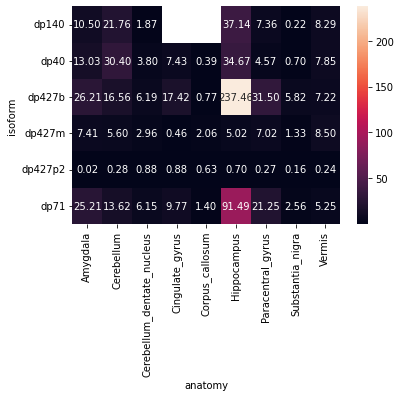

In [9]:
# set value types from string to float and plot a default heatmap
result_q6 = result_q6.astype(np.float32)
sns.heatmap(result_q6, annot=True, fmt='.2f')

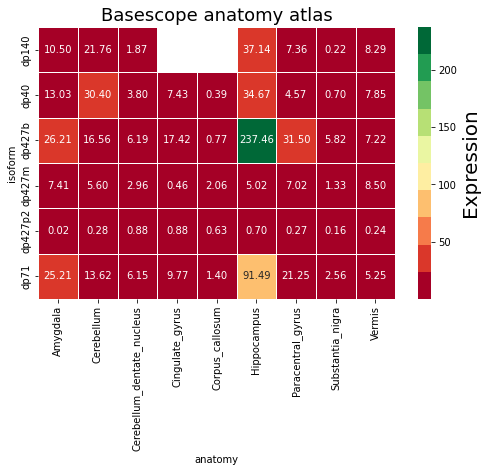

In [10]:
# embellish the plot: Define the plot 
plt.figure(figsize = [8, 5])

# set the font size and the distance of the title from the plot
title = 'Basescope anatomy atlas'
plt.title(title,fontsize=18)

ax = sns.heatmap(result_q6, annot = True, fmt='.2f', linewidths = .5,
                 cmap = plt.cm.get_cmap('RdYlGn', 10), cbar_kws={
                     'label': 'Expression', 'shrink': 1})

# this sets a label, size 20 to your color bar
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

---
### WP2 - Single cell

#### Query 10:  What cells are expressing dystrophin across the brain areas?  

In [19]:
# access the SPARQL endpoint API
sparql = SPARQLWrapper(
    "https://graphdb.dev.biosemantics.semlab-leiden.nl/repositories/BIND"
)
sparql.setHTTPAuth(BASIC)
sparql.setCredentials("nuria", "bi0_GraphDB")
sparql.setReturnFormat(JSON)

# Query SPARQL endpoint
sparql.setQuery("""
PREFIX sio: <http://semanticscience.org/resource/>
PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

    select ?gene ?anatomy ?cell_type ?expression
    where { 
        ?mouse a obo:NCBITaxon_10090 ;
                sio:SIO_000228 ?role .
        ?role a obo:OBI_0002493, sio:SIO_000016 ;
              sio:SIO_000356 ?rna_process .
        ?rna_process a obo:OBI_0002631, sio:SIO_000006 ;
                      sio:SIO_000291 ?transcript ;
                      sio:SIO_000229 ?normalized_expression ;
                      sio:SIO_000230 ?cell .
        ?transcript a sio:SIO_010450, obo:SO_0000673 ;
                        sio:SIO_010079 ?gene .
    FILTER(?gene = <https://rdf.biosemantics.org/resources/bind/gene/Dmd>)
        ?normalized_expression a sio:SIO_000015, obo:NCIT_C184799 ;
                                   sio:SIO_000008 [a obo:NCIT_C181341, sio:SIO_000614] ;
                sio:SIO_000300 ?expression .
	FILTER(?expression > 0.0) 
    ?cell a ?cell_type ;  
                sio:SIO_000068 ?anatomy .
    FILTER(?cell_type != sio:SIO_010001) 
    ?anatomy a obo:UBERON_0002616 .
} 
    """
)

try:
    res = sparql.queryAndConvert()
except Exception as e:
    print(e)

In [20]:
# get query results dataframe
# query results to clean dataframe
res_list = res["results"]["bindings"]
new_res_list = query_to_dataframe(res_list)
q10_df = pd.DataFrame.from_dict(new_res_list)
q10_df

gene  \
0  https://rdf.biosemantics.org/resources/bind/ge...   

                                             anatomy  \
0  https://rdf.biosemantics.org/resources/bind/wp...   

                                   cell_type        expression  
0  http://purl.obolibrary.org/obo/CL_0000548  1.09861228866811

In [21]:
# format cell values
q10_df.columns

Index(['gene', 'anatomy', 'cell_type', 'expression'], dtype='object')

In [22]:
q10_df["dystrophin"] = q10_df["gene"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
q10_df["anat"] = q10_df["anatomy"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
q10_df["cell"] = q10_df["cell_type"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
q10_df["expr"] = q10_df["expression"].str.rsplit('^^', 1, expand=True)[0]
q10_df

gene  \
0  https://rdf.biosemantics.org/resources/bind/ge...   

                                             anatomy  \
0  https://rdf.biosemantics.org/resources/bind/wp...   

                                   cell_type        expression dystrophin  \
0  http://purl.obolibrary.org/obo/CL_0000548  1.09861228866811        Dmd   

     anat        cell              expr  
0  cortex  CL_0000548  1.09861228866811

In [23]:
# subset the columns to plot
table_df = q10_df[['dystrophin', 'anat', 'cell', 'expr']]
table_df

dystrophin    anat        cell              expr
0        Dmd  cortex  CL_0000548  1.09861228866811

#### Query 11: What genes are differentially expressed across mouse models for each cell type and anatomical area?  

In [43]:
# Query SPARQL endpoint
sparql.setQuery("""

PREFIX obo: <http://purl.obolibrary.org/obo/>  

PREFIX sio: <http://semanticscience.org/resource/>  

  

select ?celltype ?anat ?mousemodel ?role ?gene ?val 

where {   

   ?anat a sio:SIO_001262.  

    ?cell a sio:SIO_010001.  

    ?cell sio:SIO_000068 ?anat.  

    ?cell a ?celltype.  

    FILTER(?celltype !=  sio:SIO_010001).  

    ?mouse a obo:NCBITaxon_10090; 

           sio:SIO_000228 ?role; 

           sio:SIO_000008 ?genotype. 

    ?genotype a obo:SO_0001027; 

              sio:SIO_000300 ?mousemodel. 

    ?process a obo:OBI_0002631; 

             sio:SIO_000291 ?rna.   

    ?process sio:SIO_000230 ?cell.  

    ?process sio:SIO_000229 ?out.  

    ?out sio:SIO_000008 ?normalized.  

    ?normalized a obo:NCIT_C181341.  

    ?out sio:SIO_000300 ?val.    

    ?rna sio:SIO_010079 ?gene. 

    FILTER (?val > 0)     

} 
    """
)

try:
    res = sparql.queryAndConvert()
except Exception as e:
    print(e)

In [44]:
# get query results dataframe
# query results to clean dataframe
res_list = res["results"]["bindings"]
new_res_list = query_to_dataframe(res_list)
q11_df = pd.DataFrame.from_dict(new_res_list)
q11_df

celltype  \
0   http://purl.obolibrary.org/obo/CL_0000120   
1   http://purl.obolibrary.org/obo/CL_0000120   
2   http://purl.obolibrary.org/obo/CL_0000120   
3   http://purl.obolibrary.org/obo/CL_0000120   
4   http://purl.obolibrary.org/obo/CL_0000120   
..                                        ...   
57  http://purl.obolibrary.org/obo/CL_0000548   
58  http://purl.obolibrary.org/obo/CL_0000548   
59  http://purl.obolibrary.org/obo/CL_0000548   
60  http://purl.obolibrary.org/obo/CL_0000548   
61  http://purl.obolibrary.org/obo/CL_0000548   

                                                 anat mousemodel  \
0   https://rdf.biosemantics.org/resources/bind/wp...     mdx5CV   
1   https://rdf.biosemantics.org/resources/bind/wp...        5CV   
2   https://rdf.biosemantics.org/resources/bind/wp...         WT   
3   https://rdf.biosemantics.org/resources/bind/wp...        5CV   
4   https://rdf.biosemantics.org/resources/bind/wp...         WT   
..                                                ...        ...   
57  https://rdf.biosemantics.org/resources/bind/wp...         WT   
58  https://rdf.biosemantics.org/resources/bind/wp...         WT   
59  https://rdf.biosemantics.org/resources/bind/wp...        5CV   
60  https://rdf.biosemantics.org/resources/bind/wp...         WT   
61  https://rdf.biosemantics.org/resources/bind/wp...     mdx4cv   

                                                 role  \
0   https://rdf.biosemantics.org/resources/bind/ro...   
1   https://rdf.biosemantics.org/resources/bind/ro...   
2   https://rdf.biosemantics.org/resources/bind/ro...   
3   https://rdf.biosemantics.org/resources/bind/ro...   
4   https://rdf.biosemantics.org/resources/bind/ro...   
..                                                ...   
57  https://rdf.biosemantics.org/resources/bind/ro...   
58  https://rdf.biosemantics.org/resources/bind/ro...   
59  https://rdf.biosemantics.org/resources/bind/ro...   
60  https://rdf.biosemantics.org/resources/bind/ro...   
61  https://rdf.biosemantics.org/resources/bind/wp...   

                                                 gene               val  
0   https://rdf.biosemantics.org/resources/bind/ge...  1.38629436111989  
1   https://rdf.biosemantics.org/resources/bind/ge...  1.38629436111989  
2   https://rdf.biosemantics.org/resources/bind/ge...  1.38629436111989  
3   https://rdf.biosemantics.org/resources/bind/ge...  1.38629436111989  
4   https://rdf.biosemantics.org/resources/bind/ge...  1.38629436111989  
..                                                ...               ...  
57  https://rdf.biosemantics.org/resources/bind/ge...  1.09861228866811  
58  https://rdf.biosemantics.org/resources/bind/ge...  1.09861228866811  
59  https://rdf.biosemantics.org/resources/bind/ge...  1.09861228866811  
60  https://rdf.biosemantics.org/resources/bind/ge...  1.09861228866811  
61  https://rdf.biosemantics.org/resources/bind/ge...  1.09861228866811  

[62 rows x 6 columns]

In [45]:
# format cell values
q11_df.columns

Index(['celltype', 'anat', 'mousemodel', 'role', 'gene', 'val'], dtype='object')

In [46]:
q11_df["role"] = q11_df["role"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
q11_df["gene"] = q11_df["gene"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
q11_df["anat"] = q11_df["anat"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
q11_df["celltype"] = q11_df["celltype"].str.rsplit('/', 1, expand=True)[1].str.rsplit(">", 1, expand=True)[0]
q11_df["expr"] = q11_df["val"].str.rsplit('^^', 1, expand=True)[0]
q11_df

celltype    anat mousemodel                            role    gene  \
0   CL_0000120  cortex     mdx5CV            MOUSE_36_OBI_0002492  Mrpl15   
1   CL_0000120  cortex        5CV            MOUSE_37_OBI_0002492  Mrpl15   
2   CL_0000120  cortex         WT            MOUSE_38_OBI_0002493  Mrpl15   
3   CL_0000120  cortex        5CV            MOUSE_39_OBI_0002492  Mrpl15   
4   CL_0000120  cortex         WT            MOUSE_40_OBI_0002493  Mrpl15   
..         ...     ...        ...                             ...     ...   
57  CL_0000548  cortex         WT            MOUSE_73_OBI_0002493     Dmd   
58  CL_0000548  cortex         WT            MOUSE_74_OBI_0002493     Dmd   
59  CL_0000548  cortex        5CV            MOUSE_75_OBI_0002492     Dmd   
60  CL_0000548  cortex         WT  MOUSE_CNRS-bat1-35_OBI_0002493     Dmd   
61  CL_0000548  cortex     mdx4cv        MOUSE_cmdx4c_OBI_0002493     Dmd   

                 val              expr  
0   1.38629436111989  1.38629436111989  
1   1.38629436111989  1.38629436111989  
2   1.38629436111989  1.38629436111989  
3   1.38629436111989  1.38629436111989  
4   1.38629436111989  1.38629436111989  
..               ...               ...  
57  1.09861228866811  1.09861228866811  
58  1.09861228866811  1.09861228866811  
59  1.09861228866811  1.09861228866811  
60  1.09861228866811  1.09861228866811  
61  1.09861228866811  1.09861228866811  

[62 rows x 7 columns]

In [47]:
# subset the columns to plot
q11_df = q11_df[['celltype', 'anat', 'mousemodel', 'role', 'gene', 'val']]
q11_df

celltype    anat mousemodel                            role    gene  \
0   CL_0000120  cortex     mdx5CV            MOUSE_36_OBI_0002492  Mrpl15   
1   CL_0000120  cortex        5CV            MOUSE_37_OBI_0002492  Mrpl15   
2   CL_0000120  cortex         WT            MOUSE_38_OBI_0002493  Mrpl15   
3   CL_0000120  cortex        5CV            MOUSE_39_OBI_0002492  Mrpl15   
4   CL_0000120  cortex         WT            MOUSE_40_OBI_0002493  Mrpl15   
..         ...     ...        ...                             ...     ...   
57  CL_0000548  cortex         WT            MOUSE_73_OBI_0002493     Dmd   
58  CL_0000548  cortex         WT            MOUSE_74_OBI_0002493     Dmd   
59  CL_0000548  cortex        5CV            MOUSE_75_OBI_0002492     Dmd   
60  CL_0000548  cortex         WT  MOUSE_CNRS-bat1-35_OBI_0002493     Dmd   
61  CL_0000548  cortex     mdx4cv        MOUSE_cmdx4c_OBI_0002493     Dmd   

                 val  
0   1.38629436111989  
1   1.38629436111989  
2   1.38629436111989  
3   1.38629436111989  
4   1.38629436111989  
..               ...  
57  1.09861228866811  
58  1.09861228866811  
59  1.09861228866811  
60  1.09861228866811  
61  1.09861228866811  

[62 rows x 6 columns]

From this table one could proceed with the calculation of differential expression common workflow.

---
### WP2: basescope-single cell

#### Query 19:  What anatomical areas show concordant dystrophin expression in single cell and RNA/BaseScope data?  

In [54]:
# Query SPARQL endpoint
sparql.setQuery("""


    """
)

try:
    res = sparql.queryAndConvert()
except Exception as e:
    print(e)

QueryBadFormed: A bad request has been sent to the endpoint: probably the SPARQL query is badly formed. 

Response:
b'MALFORMED QUERY: Lexical error at line 2, column 5.  Encountered: " " (32), after : "UNIR"'


/home/nur/miniconda3/lib/python3.8/site-packages/SPARQLWrapper/Wrapper.py:623: RuntimeWarning: not detected query type for query '' UNIR PER GENOTYPE     ''
  warnings.warn(
/home/nur/miniconda3/lib/python3.8/site-packages/SPARQLWrapper/Wrapper.py:633: RuntimeWarning: unknown query type 'None'
  warnings.warn("unknown query type '%s'" % r_queryType, RuntimeWarning)


In [55]:
q19_basescope_df = q6_df[['isoform', 'anatomy', 'expression']]
q19_basescope_df

isoform   anatomy expression
0      dp140  Amygdala      11.52
1       dp40  Amygdala      14.17
2     dp427m  Amygdala      16.03
3    dp427p2  Amygdala       0.05
4       dp71  Amygdala      32.42
..       ...       ...        ...
260     dp71    Vermis        7.9
261     dp71    Vermis      13.85
262   dp427b    Vermis       0.27
263   dp427b    Vermis       5.67
264   dp427b    Vermis      29.37

[265 rows x 3 columns]

In [56]:
q19_single_cell_df = q11_df[['dystrophin', 'anat', 'cell', 'expr']]
q19_single_cell_df

dystrophin    anat        cell              expr
0        Dmd  cortex  CL_0000129               0.0
1        Dmd  cortex  CL_0000548               0.0
2        Dmd  cortex  CL_0000120               0.0
3        Dmd  cortex  CL_0000548               0.0
4        Dmd  cortex  CL_0000548  1.09861228866811